RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79187D+00    |proj g|=  1.01052D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   4.194D-05   8.705D+00
  F =   8.7049672415284522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/leonardocalizaya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/leonardocalizaya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


'\n\nfor state in state_list[1:]:\n    df[state] = pd.to_numeric(df[state])\n    model = sm.tsa.statespace.SARIMAX(df[state], order = (0, 1, 1), seasonal_order = (1, 1, 0, 12))\n    model_fit = model.fit()\n    future_df[state + "_forecast"] = model_fit.predict(start = 291, end = 351, dynamic = True)\n\nfuture_df.to_csv("forecast_" + csv_import)\n\n'

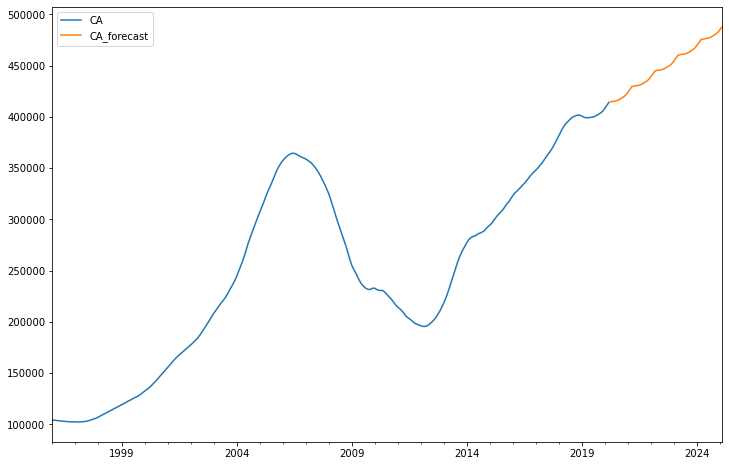

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

### Uncomment each csv_import at a time to create a forecast for different bedroom size

csv_import = '../data/State_Zhvi_1bedroom.csv'
# csv_import = 'State_Zhvi_2bedroom.csv'
# csv_import = 'State_Zhvi_3bedroom.csv'
# csv_import = 'State_Zhvi_4bedroom.csv'
# csv_import = 'State_Zhvi_5BedroomOrMore.csv'

data = pd.read_csv(csv_import, header = None)
data_refined = data.iloc[:,5:]
state_list = data_refined[5].tolist()[1:]

data_refined = data.iloc[:,6:].T

df = data_refined.rename(columns = {0: "Date"})

for index, state in enumerate(state_list):
    df.rename(columns = {index + 1 : state}, inplace = True)
    
df["CA"] = pd.to_numeric(df["CA"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace = True)
model = sm.tsa.statespace.SARIMAX(df["CA"], order = (0, 1, 1), seasonal_order = (1, 1, 0, 12))
model_fit = model.fit()
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,60)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
future_df = pd.concat([df,future_datest_df])
future_df['CA_forecast'] = model_fit.predict(start = 291, end = 351, dynamic = True)
future_df[['CA', 'CA_forecast']].plot(figsize=(12, 8))

'''

for state in state_list[1:]:
    df[state] = pd.to_numeric(df[state])
    model = sm.tsa.statespace.SARIMAX(df[state], order = (0, 1, 1), seasonal_order = (1, 1, 0, 12))
    model_fit = model.fit()
    future_df[state + "_forecast"] = model_fit.predict(start = 291, end = 351, dynamic = True)

future_df.to_csv("forecast_" + csv_import)

'''